# QFI Measurement Plotting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation


Parsed Metadata:
Lens_Name: 4x MWIR
Sensor_Name: MWIR-512
Date: 04/04/2025
FovX: 3239
FovY: 2552
Width: 640
Height: 512
StartFrame: 160
EndFrame: 162
Frames: 3
StartTime: 16010.92
EndTime: 16210.92
Expected pixels (Width x Height x Frames): 640 x 512 x 3 = 983040
Total pixels found in file: 983040


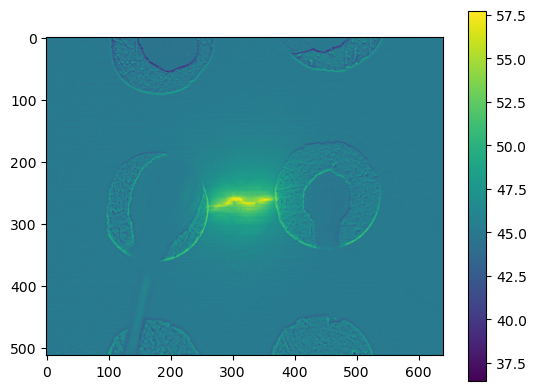

In [4]:
filename = '/Users/trevin/Documents/Git/v3o5-data-processing/qfi_measurements/data/raw/04,04,2025_174617_1x MWIR_Movie_CSV.txt'
with open(filename, 'r') as f:
    lines = f.readlines()

metadata = {}
data_lines = []

# Parse metadata lines (starting with "#") and pixel data lines.
for line in lines:
    line = line.strip()
    if line.startswith("#"):
        parts = line[1:].split(":", 1)
        if len(parts) == 2:
            key, value = parts[0].strip(), parts[1].strip()
            metadata[key] = value
    elif line:
        data_lines.append(line)

# Print parsed metadata for verification.
print("Parsed Metadata:")
for key, value in metadata.items():
    print(f"{key}: {value}")

# Concatenate all pixel data lines into a single string and split by commas.
data_string = "".join(data_lines)
pixel_strings = [s for s in data_string.split(",") if s]
pixels = np.array(list(map(float, pixel_strings)))

# --------------------------
# Use metadata for dimensions and frame count
# --------------------------
width  = int(metadata.get('Width', 640))
height = int(metadata.get('Height', 512))
frames = int(metadata.get('Frames', 3))

expected_pixels = width * height * frames

print(f"Expected pixels (Width x Height x Frames): {width} x {height} x {frames} = {expected_pixels}")
print(f"Total pixels found in file: {pixels.size}")

if pixels.size != expected_pixels:
    print(f"Warning: pixel count ({pixels.size}) does not match expected size ({expected_pixels}).")

# Reshape pixel values into a 3D array with shape (frames, height, width)
pixel_frames = pixels.reshape((frames, height, width))

# Optionally, create a list of Pandas DataFrames (one per frame)
dataframes = [pd.DataFrame(frame) for frame in pixel_frames]

# --------------------------
# Create the animation using matplotlib
# --------------------------
fig, ax = plt.subplots()
im = ax.imshow(pixel_frames[0], cmap='viridis')
plt.colorbar(im)

def update(frame_index):
    """Update function for animation; sets the image data for each new frame."""
    im.set_data(pixel_frames[frame_index])
    ax.set_title(f"Frame {frame_index+1}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=frames, interval=500, blit=False)

plt.show()

ani.save("images/qfi_animation.gif", writer="ffmpeg", fps=2)
